In [1]:
import torch
import torch.nn as nn
import torch.optim as optim

import matplotlib.pyplot as plt
from livelossplot import PlotLosses

import sys
sys.path.append('../')

In [2]:
from src.img_processing import ImageProcessor
from src.model import CPPN

In [3]:
img_processor = ImageProcessor('../references/test.png')

In [4]:
grid = img_processor.generate_5d_grid()

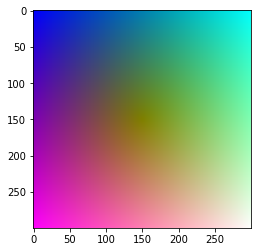

In [5]:
grid_img = img_processor.get_img_from_arr(grid[:, :3])
plt.imshow(grid_img)

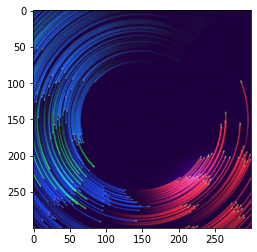

In [6]:
reference_img = img_processor.get_img_from_arr(img_processor.reference[:, :3])
plt.imshow(reference_img)

In [7]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
device

device(type='cuda')

In [8]:
grid = torch.tensor(grid, dtype=torch.float32)
reference = torch.tensor(img_processor.reference, dtype=torch.float32)

grid = grid.to(device)
reference = reference.to(device)

In [9]:
model = CPPN(inp_dim=5, n_layers=6)
if device.type == 'cuda':
    model.cuda()
    
loss = nn.MSELoss()
optimizer = optim.Adam(model.parameters(), lr=1e-2)

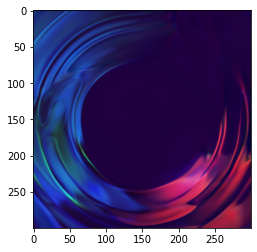

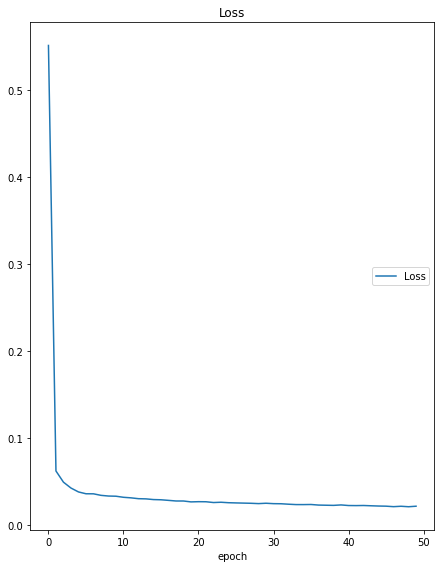

Loss
	Loss             	 (min:    0.021, max:    0.552, cur:    0.021)


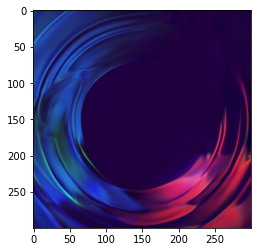

In [10]:
liveplot = PlotLosses()
model.train()

for i in range(5000):
    
    optimizer.zero_grad()
    pred = model(grid)
    l = loss(pred, reference[:, :-2])
    l.backward()
    optimizer.step()
    
    if i % 100 == 0:
        liveplot.update({'Loss': l.cpu().detach().numpy()})
        liveplot.draw()
        
        model.eval()
        with torch.no_grad():
            output = model(grid).cpu().numpy()
            
        out_img = img_processor.get_img_from_arr(output)
        plt.imshow(out_img)
        model.train()

In [11]:
torch.save(model.state_dict(), '../models/test_model.pt')